In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4,"
import numpy as np
from PIL import Image

import torch
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import timm
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

import torchmetrics
from tqdm import tqdm
import matplotlib.pyplot as plt

# torch.random.manual_seed(42)
# np.random.seed(42)


Extension horovod.torch has not been built: /home/fzj/.local/lib/python3.8/site-packages/horovod/torch/mpi_lib_v2.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still available.


In [2]:
class DiscriminatorDataset(Dataset):
    def __init__(self, image_list, label_list, transform=None):
        self.image_list = image_list
        self.label_list = label_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image = Image.open(self.image_list[idx])
        label = self.label_list[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

Epoch 1/5


train: 100%|██████████| 49/49 [01:13<00:00,  1.51s/it]


train_loss: 0.2725078694674434


val: 100%|██████████| 13/13 [00:18<00:00,  1.46s/it]


{'acc': 0.9061688184738159, 'f1': 0.9006003141403198, 'prec': 0.8920427560806274, 'rec': 0.9173147678375244}
{'acc': 0.8688311576843262, 'f1': 0.890097975730896, 'prec': 0.9761336445808411, 'rec': 0.8180000185966492}
Epoch 2/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]


train_loss: 0.11364146840891667


val: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]


{'acc': 0.97435063123703, 'f1': 0.9715970754623413, 'prec': 0.9759259819984436, 'rec': 0.9676852226257324}
{'acc': 0.9707792401313782, 'f1': 0.977477490901947, 'prec': 0.9784569144248962, 'rec': 0.9764999747276306}
Epoch 3/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.30it/s]


train_loss: 0.04450938269039806


val: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]


{'acc': 0.8831169009208679, 'f1': 0.8587155938148499, 'prec': 0.9237288236618042, 'rec': 0.8333333730697632}
{'acc': 0.893831193447113, 'f1': 0.9244280457496643, 'prec': 0.8594757318496704, 'rec': 1.0}
Epoch 4/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.30it/s]


train_loss: 0.03128636934395347


val: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]


{'acc': 0.9818181991577148, 'f1': 0.9799594879150391, 'prec': 0.9818871021270752, 'rec': 0.9781203269958496}
{'acc': 0.9795454740524292, 'f1': 0.9842065572738647, 'prec': 0.9869281053543091, 'rec': 0.9815000295639038}
Epoch 5/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]


train_loss: 0.0341551026129829


val: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


{'acc': 0.9892857074737549, 'f1': 0.9882285594940186, 'prec': 0.988542914390564, 'rec': 0.9879167079925537}
{'acc': 0.9876623153686523, 'f1': 0.9904857873916626, 'prec': 0.9919759035110474, 'rec': 0.9890000224113464}


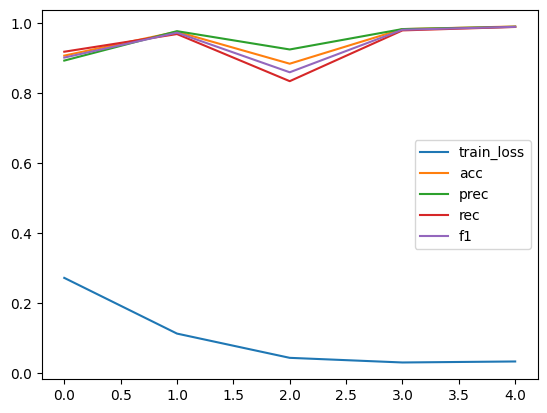

Epoch 1/5


train: 100%|██████████| 49/49 [00:54<00:00,  1.12s/it]


train_loss: 0.2563052121169713


val: 100%|██████████| 13/13 [00:17<00:00,  1.35s/it]


{'acc': 0.9110389351844788, 'f1': 0.8969743251800537, 'prec': 0.9283033609390259, 'rec': 0.879111111164093}
{'acc': 0.9139610528945923, 'f1': 0.9367088675498962, 'prec': 0.8966621160507202, 'rec': 0.9804999828338623}
Epoch 2/5


train: 100%|██████████| 49/49 [00:26<00:00,  1.88it/s]


train_loss: 0.0853204293442624


val: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


{'acc': 0.7496753334999084, 'f1': 0.7488646507263184, 'prec': 0.7871494889259338, 'rec': 0.8044815063476562}
{'acc': 0.7288960814476013, 'f1': 0.7383265495300293, 'prec': 0.989084780216217, 'rec': 0.5889999866485596}
Epoch 3/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.32it/s]


train_loss: 0.057757011728779395


val: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


{'acc': 0.9246753454208374, 'f1': 0.912473201751709, 'prec': 0.9476180076599121, 'rec': 0.8928055763244629}
{'acc': 0.9279220700263977, 'f1': 0.9473932981491089, 'prec': 0.9004504680633545, 'rec': 0.9994999766349792}
Epoch 4/5


train: 100%|██████████| 49/49 [00:22<00:00,  2.22it/s]


train_loss: 0.029971506427593376


val: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


{'acc': 0.9191558361053467, 'f1': 0.9055498838424683, 'prec': 0.9446420669555664, 'rec': 0.8847222328186035}
{'acc': 0.9256493449211121, 'f1': 0.945850133895874, 'prec': 0.8972633481025696, 'rec': 1.0}
Epoch 5/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.29it/s]


train_loss: 0.02650601463392377


val: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


{'acc': 0.37467533349990845, 'f1': 0.2999970316886902, 'prec': 0.6796407103538513, 'rec': 0.5184999704360962}
{'acc': 0.3698051869869232, 'f1': 0.05730937421321869, 'prec': 1.0, 'rec': 0.029500000178813934}


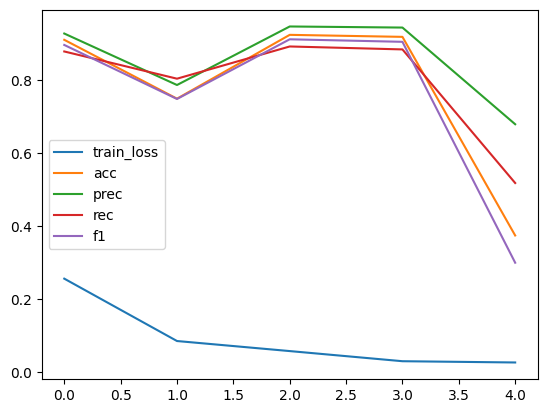

Epoch 1/5


train: 100%|██████████| 49/49 [01:02<00:00,  1.28s/it]


train_loss: 0.2645276280082002


val: 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]


{'acc': 0.9409090876579285, 'f1': 0.9343131184577942, 'prec': 0.9402985572814941, 'rec': 0.9291573762893677}
{'acc': 0.9314935207366943, 'f1': 0.9469982385635376, 'prec': 0.9515396356582642, 'rec': 0.9424999952316284}
Epoch 2/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]


train_loss: 0.09746922392930303


val: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]


{'acc': 0.8694804906845093, 'f1': 0.8654042482376099, 'prec': 0.8629940748214722, 'rec': 0.8975833654403687}
{'acc': 0.8392857313156128, 'f1': 0.8590947389602661, 'prec': 0.9973562359809875, 'rec': 0.7544999718666077}
Epoch 3/5


train: 100%|██████████| 49/49 [00:22<00:00,  2.20it/s]


train_loss: 0.060230697030011486


val: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


{'acc': 0.9694805145263672, 'f1': 0.9658194780349731, 'prec': 0.9766967296600342, 'rec': 0.9571203589439392}
{'acc': 0.9750000238418579, 'f1': 0.9810578227043152, 'prec': 0.9656174182891846, 'rec': 0.996999979019165}
Epoch 4/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.35it/s]


train_loss: 0.029446102507716537


val: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


{'acc': 0.5055195093154907, 'f1': 0.48581087589263916, 'prec': 0.7074529528617859, 'rec': 0.6192499995231628}
{'acc': 0.4720779359340668, 'f1': 0.31508004665374756, 'prec': 1.0, 'rec': 0.18700000643730164}
Epoch 5/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]


train_loss: 0.02506826953886419


val: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]


{'acc': 0.7558441758155823, 'f1': 0.6538299918174744, 'prec': 0.8633720874786377, 'rec': 0.6518518328666687}
{'acc': 0.7607142925262451, 'f1': 0.8444163203239441, 'prec': 0.7307270765304565, 'rec': 1.0}


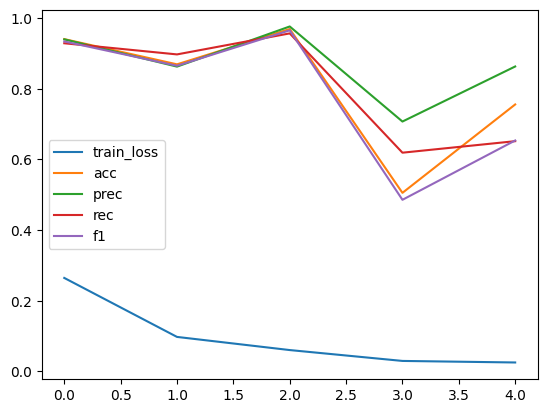

Epoch 1/5


train: 100%|██████████| 49/49 [00:59<00:00,  1.20s/it]


train_loss: 0.2747216948441097


val: 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


{'acc': 0.8288961052894592, 'f1': 0.780434250831604, 'prec': 0.8957261443138123, 'rec': 0.7560185194015503}
{'acc': 0.8532467484474182, 'f1': 0.8983355760574341, 'prec': 0.8164349794387817, 'rec': 0.9984999895095825}
Epoch 2/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]


train_loss: 0.1020828274135687


val: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


{'acc': 0.48376622796058655, 'f1': 0.4582849144935608, 'prec': 0.7009978294372559, 'rec': 0.6022870540618896}
{'acc': 0.4305194914340973, 'f1': 0.21975089609622955, 'prec': 0.9959677457809448, 'rec': 0.12349999696016312}
Epoch 3/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]


train_loss: 0.052351945726086896


val: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


{'acc': 0.9672077894210815, 'f1': 0.9631949663162231, 'prec': 0.9753775596618652, 'rec': 0.9536666870117188}
{'acc': 0.9737012982368469, 'f1': 0.9800934195518494, 'prec': 0.9637506008148193, 'rec': 0.996999979019165}
Epoch 4/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.24it/s]


train_loss: 0.03542020979660506


val: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]


{'acc': 0.6918830871582031, 'f1': 0.5122970938682556, 'prec': 0.8390979766845703, 'rec': 0.5606481432914734}
{'acc': 0.6993506550788879, 'f1': 0.8120178580284119, 'prec': 0.6835269927978516, 'rec': 1.0}
Epoch 5/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.24it/s]


train_loss: 0.029499783465752796


val: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]


{'acc': 0.42240259051322937, 'f1': 0.3736859858036041, 'prec': 0.6888772249221802, 'rec': 0.5552499890327454}
{'acc': 0.39642858505249023, 'f1': 0.13171415030956268, 'prec': 1.0, 'rec': 0.07050000131130219}


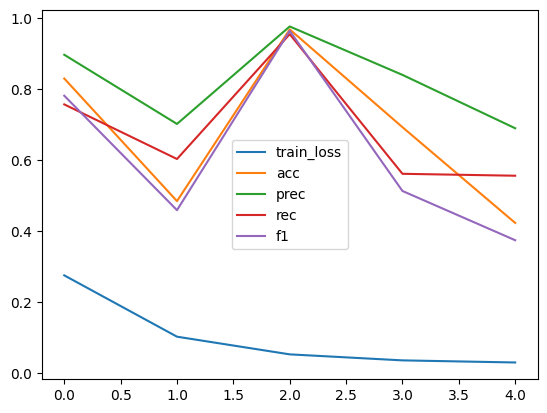

Epoch 1/5


train: 100%|██████████| 49/49 [00:51<00:00,  1.06s/it]


train_loss: 0.26552956182585685


val: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]


{'acc': 0.5237013101577759, 'f1': 0.5081892013549805, 'prec': 0.7120141386985779, 'rec': 0.6332499980926514}
{'acc': 0.47175323963165283, 'f1': 0.3143700063228607, 'prec': 1.0, 'rec': 0.18649999797344208}
Epoch 2/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]


train_loss: 0.09970544993269201


val: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


{'acc': 0.7860389351844788, 'f1': 0.7843695878982544, 'prec': 0.809022843837738, 'rec': 0.8341851830482483}
{'acc': 0.7353895902633667, 'f1': 0.7442736029624939, 'prec': 0.9991575479507446, 'rec': 0.5929999947547913}
Epoch 3/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.23it/s]


train_loss: 0.047762414117400745


val: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]


{'acc': 0.8191558718681335, 'f1': 0.7651485204696655, 'prec': 0.891083300113678, 'rec': 0.7421296238899231}
{'acc': 0.8350649476051331, 'f1': 0.8873114585876465, 'prec': 0.7974481582641602, 'rec': 1.0}
Epoch 4/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.30it/s]


train_loss: 0.034428788900223314


val: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


{'acc': 0.9785714149475098, 'f1': 0.9766948223114014, 'prec': 0.9725743532180786, 'rec': 0.9813703298568726}
{'acc': 0.9620130062103271, 'f1': 0.9699615240097046, 'prec': 0.9968338012695312, 'rec': 0.9445000290870667}
Epoch 5/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.29it/s]


train_loss: 0.02169140094739138


val: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]


{'acc': 0.9821428656578064, 'f1': 0.9802080392837524, 'prec': 0.9851148724555969, 'rec': 0.9758148193359375}
{'acc': 0.984415590763092, 'f1': 0.9880477786064148, 'prec': 0.9841269850730896, 'rec': 0.9919999837875366}


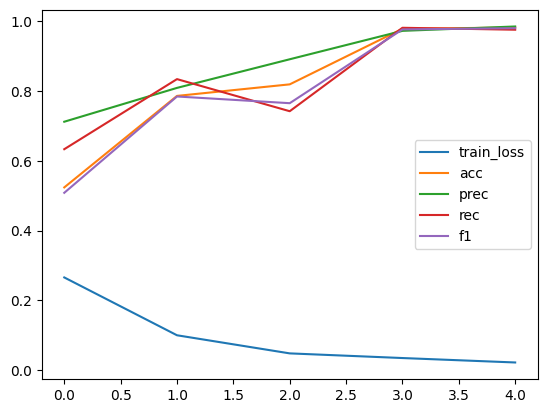

Epoch 1/5


train: 100%|██████████| 49/49 [00:56<00:00,  1.15s/it]


train_loss: 0.3047060069380974


val: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


{'acc': 0.8659090995788574, 'f1': 0.8607832193374634, 'prec': 0.8557790517807007, 'rec': 0.8878055810928345}
{'acc': 0.7555195093154907, 'f1': 0.770076334476471, 'prec': 0.9890196323394775, 'rec': 0.6305000185966492}
Epoch 2/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.31it/s]


train_loss: 0.13944669128680715


val: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]


{'acc': 0.8275973796844482, 'f1': 0.7789406776428223, 'prec': 0.8927428722381592, 'rec': 0.7548055648803711}
{'acc': 0.8811688423156738, 'f1': 0.9159007668495178, 'prec': 0.8473639488220215, 'rec': 0.9965000152587891}
Epoch 3/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.33it/s]


train_loss: 0.08179057936887352


val: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


{'acc': 0.748701274394989, 'f1': 0.6454692482948303, 'prec': 0.8381110429763794, 'rec': 0.6450740694999695}
{'acc': 0.7681818008422852, 'f1': 0.8466494679450989, 'prec': 0.7420933842658997, 'rec': 0.9854999780654907}
Epoch 4/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.36it/s]


train_loss: 0.0871954873128205


val: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


{'acc': 0.6873376369476318, 'f1': 0.5007264018058777, 'prec': 0.8374958038330078, 'rec': 0.5541666746139526}
{'acc': 0.7074675559997559, 'f1': 0.8160849213600159, 'prec': 0.689548134803772, 'rec': 0.9994999766349792}
Epoch 5/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]


train_loss: 0.050992678831882625


val: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]


{'acc': 0.7227272987365723, 'f1': 0.585078775882721, 'prec': 0.8503854274749756, 'rec': 0.604629635810852}
{'acc': 0.748701274394989, 'f1': 0.8377358317375183, 'prec': 0.7212996482849121, 'rec': 0.9990000128746033}


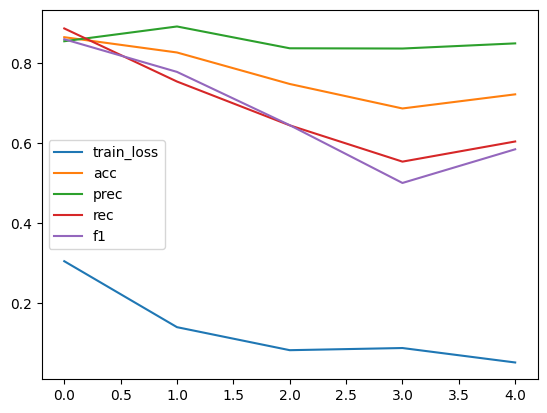

Epoch 1/5


train: 100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


train_loss: 0.28520926757126436


val: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


{'acc': 0.8957791924476624, 'f1': 0.8847449421882629, 'prec': 0.8877003788948059, 'rec': 0.8820555210113525}
{'acc': 0.8831169009208679, 'f1': 0.9079754948616028, 'prec': 0.9288703203201294, 'rec': 0.8880000114440918}
Epoch 2/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]


train_loss: 0.11899326544026939


val: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


{'acc': 0.7142857313156128, 'f1': 0.5665853023529053, 'prec': 0.8448145389556885, 'rec': 0.5928055644035339}
{'acc': 0.7389610409736633, 'f1': 0.8324301838874817, 'prec': 0.7137240767478943, 'rec': 0.9984999895095825}
Epoch 3/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]


train_loss: 0.07114615203926758


val: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


{'acc': 0.6970779299736023, 'f1': 0.5252372026443481, 'prec': 0.8409478664398193, 'rec': 0.5680555701255798}
{'acc': 0.7116883397102356, 'f1': 0.8183305859565735, 'prec': 0.692520797252655, 'rec': 1.0}
Epoch 4/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.29it/s]


train_loss: 0.05229449382393944


val: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


{'acc': 0.8103896379470825, 'f1': 0.7510210275650024, 'prec': 0.886996865272522, 'rec': 0.729629635810852}
{'acc': 0.8337662220001221, 'f1': 0.8865247964859009, 'prec': 0.7961783409118652, 'rec': 1.0}
Epoch 5/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]


train_loss: 0.03537225688104423


val: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


{'acc': 0.9814935326576233, 'f1': 0.9798687696456909, 'prec': 0.9757988452911377, 'rec': 0.9844722151756287}
{'acc': 0.9681817889213562, 'f1': 0.9749231934547424, 'prec': 0.99842768907547, 'rec': 0.9524999856948853}


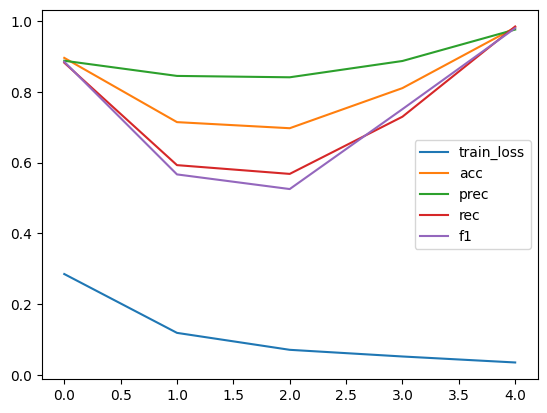

Epoch 1/5


train: 100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


train_loss: 0.2954693015436737


val: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]


{'acc': 0.9068182110786438, 'f1': 0.9003798961639404, 'prec': 0.8927717208862305, 'rec': 0.9122778177261353}
{'acc': 0.8743506669998169, 'f1': 0.8950935006141663, 'prec': 0.9775014519691467, 'rec': 0.8255000114440918}
Epoch 2/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]


train_loss: 0.12085795022395192


val: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]


{'acc': 0.7662337422370911, 'f1': 0.675600528717041, 'prec': 0.8601038455963135, 'rec': 0.6679444313049316}
{'acc': 0.7870129942893982, 'f1': 0.8587424159049988, 'prec': 0.7541603446006775, 'rec': 0.996999979019165}
Epoch 3/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.32it/s]


train_loss: 0.08164330556684611


val: 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]


{'acc': 0.6938311457633972, 'f1': 0.5171844959259033, 'prec': 0.8397893309593201, 'rec': 0.5634258985519409}
{'acc': 0.7019480466842651, 'f1': 0.8133387565612793, 'prec': 0.6854009628295898, 'rec': 1.0}
Epoch 4/5


train: 100%|██████████| 49/49 [00:22<00:00,  2.19it/s]


train_loss: 0.08188367201661577


val: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]


{'acc': 0.5470778942108154, 'f1': 0.536138117313385, 'prec': 0.7173323631286621, 'rec': 0.6510370373725891}
{'acc': 0.49318182468414307, 'f1': 0.3599835932254791, 'prec': 1.0, 'rec': 0.21950000524520874}
Epoch 5/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]


train_loss: 0.0732297868068729


val: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]


{'acc': 0.9464285969734192, 'f1': 0.9428670406341553, 'prec': 0.9339315891265869, 'rec': 0.9572592973709106}
{'acc': 0.9224026203155518, 'f1': 0.936587929725647, 'prec': 0.9977388381958008, 'rec': 0.8824999928474426}


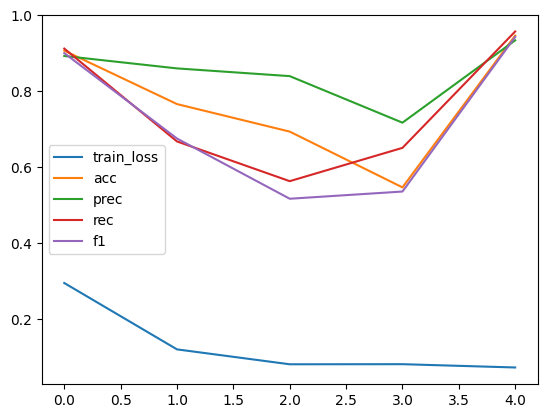

Epoch 1/5


train: 100%|██████████| 49/49 [00:57<00:00,  1.17s/it]


train_loss: 0.2883170605922232


val: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


{'acc': 0.8522727489471436, 'f1': 0.8216066360473633, 'prec': 0.8799870014190674, 'rec': 0.7997870445251465}
{'acc': 0.8636363744735718, 'f1': 0.9013158082962036, 'prec': 0.8501772880554199, 'rec': 0.9589999914169312}
Epoch 2/5


train: 100%|██████████| 49/49 [00:23<00:00,  2.07it/s]


train_loss: 0.13365316079283246


val: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


{'acc': 0.7464285492897034, 'f1': 0.6392154693603516, 'prec': 0.84332275390625, 'rec': 0.6407685279846191}
{'acc': 0.7571428418159485, 'f1': 0.8415254354476929, 'prec': 0.7301470637321472, 'rec': 0.9929999709129333}
Epoch 3/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.33it/s]


train_loss: 0.09735836354749543


val: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


{'acc': 0.7720779180526733, 'f1': 0.6884129047393799, 'prec': 0.8551739454269409, 'rec': 0.6777685284614563}
{'acc': 0.7837662100791931, 'f1': 0.8560933470726013, 'prec': 0.7538051605224609, 'rec': 0.9904999732971191}
Epoch 4/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.35it/s]


train_loss: 0.07532917902025642


val: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


{'acc': 0.8113636374473572, 'f1': 0.7526086568832397, 'prec': 0.8874467611312866, 'rec': 0.7310185432434082}
{'acc': 0.8334415555000305, 'f1': 0.8861770629882812, 'prec': 0.7965695858001709, 'rec': 0.9984999895095825}
Epoch 5/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.37it/s]


train_loss: 0.05220942754222422


val: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]


{'acc': 0.7318181991577148, 'f1': 0.730314314365387, 'prec': 0.7599215507507324, 'rec': 0.7790185213088989}
{'acc': 0.7045454382896423, 'f1': 0.7127524614334106, 'prec': 0.9666095972061157, 'rec': 0.5644999742507935}


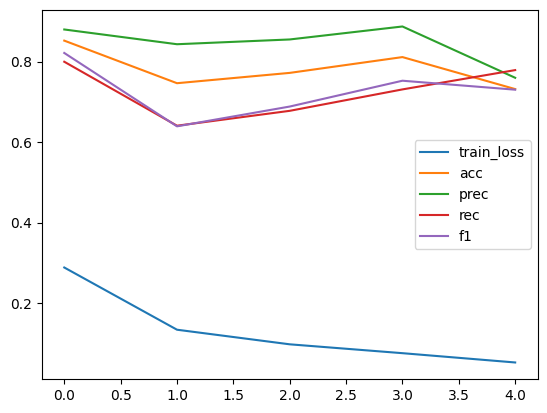

Epoch 1/5


train: 100%|██████████| 49/49 [01:02<00:00,  1.28s/it]


train_loss: 0.3102231606536982


val: 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]


{'acc': 0.7629870176315308, 'f1': 0.681204617023468, 'prec': 0.8191287517547607, 'rec': 0.6716203689575195}
{'acc': 0.78311687707901, 'f1': 0.8501569628715515, 'prec': 0.7709519863128662, 'rec': 0.9474999904632568}
Epoch 2/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]


train_loss: 0.14245642314912105


val: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]


{'acc': 0.8136363625526428, 'f1': 0.7592407464981079, 'prec': 0.8761410713195801, 'rec': 0.7374536991119385}
{'acc': 0.8467532396316528, 'f1': 0.8929704427719116, 'prec': 0.8170124292373657, 'rec': 0.984499990940094}
Epoch 3/5


train: 100%|██████████| 49/49 [00:22<00:00,  2.22it/s]


train_loss: 0.07642958647742563


val: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]


{'acc': 0.8123376369476318, 'f1': 0.7541918158531189, 'prec': 0.8878976106643677, 'rec': 0.7324073910713196}
{'acc': 0.8626623153686523, 'f1': 0.9043202996253967, 'prec': 0.8256918787956238, 'rec': 0.9994999766349792}
Epoch 4/5


train: 100%|██████████| 49/49 [00:21<00:00,  2.24it/s]


train_loss: 0.0609558317810297


val: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]


{'acc': 0.9246753454208374, 'f1': 0.9202439785003662, 'prec': 0.9111447930335999, 'rec': 0.9379537105560303}
{'acc': 0.8678571581840515, 'f1': 0.8871638178825378, 'prec': 0.9956440329551697, 'rec': 0.800000011920929}
Epoch 5/5


train: 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]


train_loss: 0.04648982627051217


val: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


{'acc': 0.6944805383682251, 'f1': 0.5188041925430298, 'prec': 0.8400204181671143, 'rec': 0.5643518567085266}
{'acc': 0.7198051810264587, 'f1': 0.8225375413894653, 'prec': 0.6985679268836975, 'rec': 1.0}


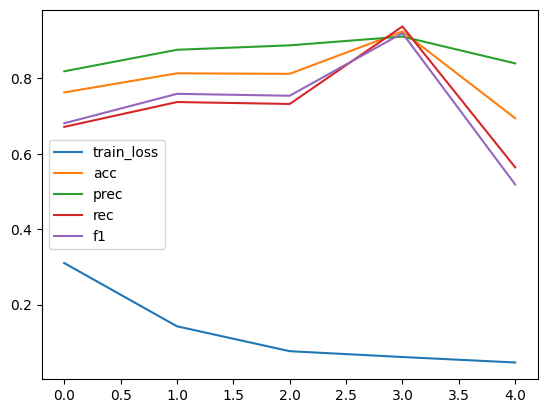

In [3]:
for dname in ['mosaic_2_112', 'bezier224_5_0.2_0.05_1d1']:
    for run in range(5, 10):
        train_image_dir = 'data/WSSS4LUAD/1.training'
        no_stain_norm_synthesize_image_dir = f"data/WSSS4LUAD/{dname}_run{run}/img"
        log_dir = f'discriminate_logs/wsss4luad_disc_{dname}_run{run}.txt'

        train_image_list = sorted([os.path.join(train_image_dir, i) for i in os.listdir(train_image_dir) if ".png" in i])
        real_image_list = []
        for image_name in train_image_list:
            label_str = '[' + image_name.split(']')[0].split('[')[-1] + ']'
            label = eval(label_str)
            if sum(label) > 1:
                real_image_list.append(image_name)

        synthesize_image_list = sorted([os.path.join(no_stain_norm_synthesize_image_dir, i) for i in os.listdir(no_stain_norm_synthesize_image_dir) if ".png" in i])

        np.random.shuffle(real_image_list)
        np.random.shuffle(synthesize_image_list)

        train_real_image_list = real_image_list[:int(len(real_image_list)*0.8)]
        val_real_image_list = real_image_list[int(len(real_image_list)*0.8):]

        train_synthesize_image_list = synthesize_image_list[:int(len(synthesize_image_list)*0.8)]
        val_synthesize_image_list = synthesize_image_list[int(len(synthesize_image_list)*0.8):]

        train_image_list = train_real_image_list + train_synthesize_image_list
        train_label_list = [1] * len(train_real_image_list) + [0] * len(train_synthesize_image_list)

        val_image_list = val_real_image_list + val_synthesize_image_list
        val_label_list = [1] * len(val_real_image_list) + [0] * len(val_synthesize_image_list)


        train_dataset = DiscriminatorDataset(train_image_list, train_label_list, transform=transforms.Compose([
            transforms.Resize((224,224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=IMAGENET_DEFAULT_MEAN, std=IMAGENET_DEFAULT_STD)
        ]))

        val_dataset = DiscriminatorDataset(val_image_list, val_label_list, transform=transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=IMAGENET_DEFAULT_MEAN, std=IMAGENET_DEFAULT_STD)
        ]))

        train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
        val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=4)

        model = timm.create_model('resnet18', pretrained=False, num_classes=2)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        # criterion = nn.BCEWithLogitsLoss()
        criterion = nn.CrossEntropyLoss()
        metrics = torchmetrics.MetricCollection({ 
            'acc': torchmetrics.Accuracy(num_classes=2, average='micro'), 
            'prec': torchmetrics.Precision(num_classes=2, average='macro'), 
            'rec': torchmetrics.Recall(num_classes=2, average='macro'),
            'f1': torchmetrics.F1Score(num_classes=2, average='macro')
        }).cuda()

        neg_metrics = torchmetrics.MetricCollection({ 
            'acc': torchmetrics.Accuracy(task='binary'), 
            'prec': torchmetrics.Precision(task='binary'), 
            'rec': torchmetrics.Recall(task='binary'),
            'f1': torchmetrics.F1Score(task='binary')
        }).cuda()

        model = model.cuda()

        EPOCH_NUM = 5
        best_acc = 0
        train_loss_list = []
        val_metrics_list = []
        for epoch in range(EPOCH_NUM):
            print(f"Epoch {epoch+1}/{EPOCH_NUM}")
            model.train()
            loss_list = []
            for batch in tqdm(train_dataloader, desc='train'):
                image, label = batch
                image = image.cuda()
                label = label.cuda()
                optimizer.zero_grad()
                output = model(image) # 1 real, 0 fake
                loss = criterion(output, label)
                loss_list.append(loss.item())
                loss.backward()
                optimizer.step()
            print(f'train_loss: {np.mean(loss_list)}')
            train_loss_list.append(np.mean(loss_list))

            model.eval()
            for batch in tqdm(val_dataloader, desc='val'):
                image, label = batch
                image = image.cuda()
                label = label.cuda()
                with torch.no_grad():
                    output = model(image)
                metrics(output, label)
                neg_metrics(preds=output[:,0], target=1-label)
            
            metrics_dict = metrics.compute()
            neg_metrics_dict = neg_metrics.compute()
            metrics.reset()
            neg_metrics.reset()

            val_metrics_list.append(metrics_dict)
            if metrics_dict['acc'] > best_acc:
                best_acc = metrics_dict['acc']
                torch.save(model.state_dict(), f"weights/dis_{dname}_r18_e5_run{run}.pth")
            print({k: v.item() for k, v in metrics_dict.items()})
            print({k: v.item() for k, v in neg_metrics_dict.items()})

            with open(log_dir, 'a') as f:
                f.write(f"Epoch {epoch+1}/{EPOCH_NUM}\n")
                f.write(f'train_loss: {np.mean(loss_list)}\n')
                f.write(str({k: v.item() for k, v in metrics_dict.items()}) + '\n')
                f.write(str({k: v.item() for k, v in neg_metrics_dict.items()}) + '\n')

        plt.plot(train_loss_list, label='train_loss')
        plt.plot([i['acc'].item() for i in val_metrics_list], label='acc')
        plt.plot([i['prec'].item() for i in val_metrics_list], label='prec')
        plt.plot([i['rec'].item() for i in val_metrics_list], label='rec')
        plt.plot([i['f1'].item() for i in val_metrics_list], label='f1')
        plt.legend()
        plt.savefig(f'discriminate_logs/dis_wsss4luad_{dname}_r18_e5_run{run}.png')
        plt.show()
        plt.clf()
        plt.close()